# 3. __How to detect outliers using Z score?__

## What is Z Score?

Z score is one of the most important concepts in statistics. It is also called __standard score__. Typically it is used to scale the features for machine learning. But can also be used to detect outliers.

How is Z-score used in machine learning?

Now, different variables/features in a dataset have different range of values. 

For example: A feature like 'Age' may vary from 1 to 90, whereas 'income' may go all the to 10's of thousands. Looking at a particular value (or observation), for any given variable, it is difficult to say how far is it from the mean without actually computing the mean.

This is where Z-score helps. 

It is used to standardize the variable, so that just by knowing the value of a particular observation, __you get the sense of how far away it is from the mean__.

More specifically, 'Z score' tells __how many standard deviations away a data point is from the mean__.

The process of transforming a feature to its z-scores is called __'Standardization'__.

## Formula for Z Score

The formula for Z-score is as follows:

$$ Z score = (x -mean) / std. deviation $$

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

Z-score can be both positive and negative. The farther away from 0, higher the chance of a given data point being an outlier. Typically, Z-score greater than 3 is considered extreme.

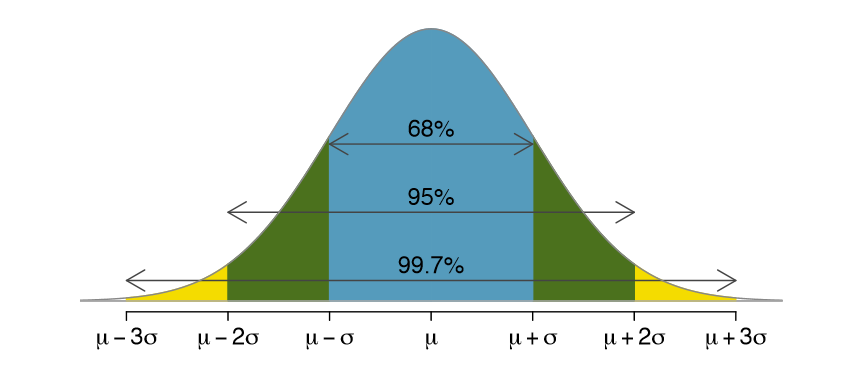

source: [pinterest graphic](https://www.pinterest.com/pin/716213146972151204/)

A normal distribution is shown below and it is estimated that
- 68% of the data points lie between +/- 1 standard deviation.
- 95% of the data points lie between +/- 2 standard deviation
- 99.7% of the data points lie between +/- 3 standard deviation

Common Data that follow normal distribution
- Heights of people
- Income
- Blood pressure
- Salaries etc


__Load the dataset (dont run if you followed along previously)__

In [1]:
# Import libraries 
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Maths
import math

# Set pandas options to show more rows and columns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

__Read the data__

In [3]:
# Read data in form of a csv file
df = pd.read_csv("../00_Datasets/Churn_Modelling_m.csv")

# First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,NaN,1,1,1,79084.10,0


__Histogram__

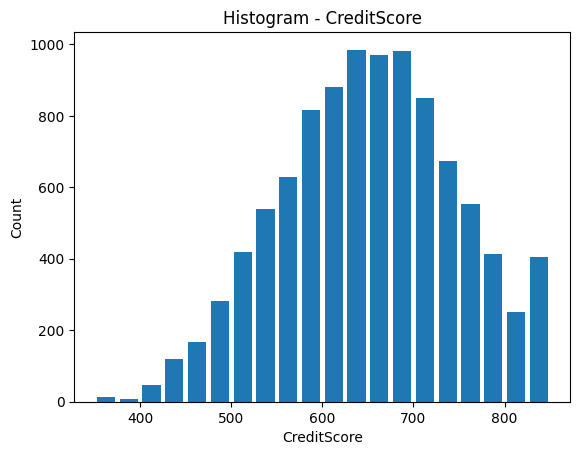

In [4]:
plt.hist(df.CreditScore, bins=20, rwidth=0.8)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Histogram - CreditScore')
plt.show()

__Standard Deviation and Mean__

In [5]:
np.nanstd(df.CreditScore.values.tolist())

96.6527190618191

In [6]:
np.nanmean(df.CreditScore.values)

650.5254525452546

Check for any infinity values.

In [7]:
np.isinf(df[['CreditScore']]).values.sum()

0

Let's compute the Z-score. First, compute the mean and standard deviation.

In [8]:
# Compute Z Score
cr_mean = np.nanmean(df.CreditScore.values.tolist())
cr_std = np.nanstd(df.CreditScore.values.tolist())

print("Mean Credit Score is: ", cr_mean)
print("Std Credit Score is: ", cr_std)

Mean Credit Score is:  650.5254525452546
Std Credit Score is:  96.6527190618191


__Calculate Z Score__

From each observation, subtract the mean and divide by the standard deviation.

In [9]:
df['zscore_CreditScore'] = (df.CreditScore  - cr_mean ) / cr_std
df[["Surname", "CreditScore", "zscore_CreditScore"]].head()

,Surname,CreditScore,zscore_CreditScore
0,Hargrave,619.0,-0.326172
1,Hill,608.0,-0.439982
2,Onio,502.0,-1.536692
3,Boni,699.0,0.501533
4,Mitchell,850.0,2.063828


__Extract the outliers/extreme values based on Z-score__

Generally, we consider the values outside of +3 and -3 standard deviations to be extreme values. Let's extract them.

In [10]:
# Extreme values based on credit score.
df[(df.zscore_CreditScore<-3) | (df.zscore_CreditScore>3)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,zscore_CreditScore
1405,1406,15612494,Panicucci,359.0,France,Female,44.0,6,128747.69,1,1,0,146955.71,1,-3.016216
1631,1632,15685372,Azubuike,350.0,Spain,Male,54.0,1,152677.48,1,1,1,191973.49,1,-3.109333
1838,1839,15758813,Campbell,350.0,Germany,Male,39.0,0,109733.20,2,0,0,123602.11,1,-3.109333
1962,1963,15692416,Aikenhead,358.0,Spain,Female,52.0,8,143542.36,3,1,0,141959.11,1,-3.026562
2473,2474,15679249,Chou,351.0,Germany,Female,57.0,4,163146.46,1,1,0,169621.69,1,-3.098986
8723,8724,15803202,Onyekachi,350.0,France,Male,51.0,10,0.00,1,1,1,125823.79,1,-3.109333
8762,8763,15765173,Lin,350.0,France,Female,60.0,3,0.00,1,0,0,113796.15,1,-3.109333
9624,9625,15668309,Maslow,350.0,France,Female,40.0,0,111098.85,1,1,1,172321.21,1,-3.109333


__Treat Outliers__



Find the Credit score value corresponding to z = 3 and -3. These will be the upper and lower caps.

In [11]:
z_3 = (3 * cr_std)+ (cr_mean)
print(z_3)

z_minus3 = (cr_mean) - (3 * cr_std)
print(z_minus3)

940.4836097307118
360.56729535979724


Replace the values by capping with the upper and lower limits. 

In [12]:
## Cap Outliers 
# df[CreditScore][(df.zscore_CreditScore<-3)] = z_minus3 
# df[CreditScore][(df.zscore_CreditScore>3)] = z_3

## __What are different ways to treat outliers?__

It is not always a requirement to 'treat' outliers. If you feel that the outliers are valid datapoints and you want the ML algorithm to model and predict them, then no need to 'treat' outliers. 

However, if you feel you don't want your model to make such extreme predictions, then you should go ahead and treat them. 

There are different ways to treat the outliers:

1. Remove the observations containing the outliers

2. Quantile based capping the extreme values. For example: All values greater than 99%ile can be replaced with 99%ile value or all values greater than z-score of 3 be replaced with 3.

3. __Treat the value as missing value and use all the different [imputation methods].__


### Remove the outlier observations
In the previous section, you have computed the z score. All you have to do is remove the points which has z score more than 3 or less than -3. Or have the points which have z score less than 3 and more than -3.

In [13]:
new_df = df[(df.zscore_CreditScore<-3) | (df.zscore_CreditScore>3)]
new_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,zscore_CreditScore
1405,1406,15612494,Panicucci,359.0,France,Female,44.0,6,128747.69,1,1,0,146955.71,1,-3.016216
1631,1632,15685372,Azubuike,350.0,Spain,Male,54.0,1,152677.48,1,1,1,191973.49,1,-3.109333
1838,1839,15758813,Campbell,350.0,Germany,Male,39.0,0,109733.20,2,0,0,123602.11,1,-3.109333
1962,1963,15692416,Aikenhead,358.0,Spain,Female,52.0,8,143542.36,3,1,0,141959.11,1,-3.026562
2473,2474,15679249,Chou,351.0,Germany,Female,57.0,4,163146.46,1,1,0,169621.69,1,-3.098986


### Quantile based capping
Cap the outliers with the quantile values, generally we go ahead with 5% and 95% quantiles (or 10% and 90% quantiles). As per the requirement you can change it as well

In [14]:
# Computing 10th, 90th percentiles and replacing the outliers
lower_cap_percentile = np.nanpercentile(df['CreditScore'], 10)
upper_cap_percentile = np.nanpercentile(df['CreditScore'], 90)

print("10 percentile :", lower_cap_percentile)
print("90 percentile :", upper_cap_percentile)

10 percentile : 521.0
90 percentile : 778.0


Let's print the original values from rownumbers 1406, 1632, 1839 which has 3 outliers. Later we will print it post outlier treatment

In [15]:
# original values
mask = df.RowNumber.isin([1406, 1632, 1839])
df.loc[mask, 'CreditScore']

1405    359.0
1631    350.0
1838    350.0
Name: CreditScore, dtype: float64

__Do Outlier Capping__

That is, those values lower than the `lower_cap_percentile`, will be replaced with `lower_cap_percentile`.

In [16]:
# Outlier capping
new_col = np.where(df['CreditScore'] < lower_cap_percentile, lower_cap_percentile, df['CreditScore'])
df['CreditScore_capped'] = new_col
df[['CreditScore', 'CreditScore_capped']][mask]

,CreditScore,CreditScore_capped
1405,359.0,521.0
1631,350.0,521.0
1838,350.0,521.0


As you can see the outlier values have now been capped with the lower limit.

__Imputation based Approaches to treat outliers__

There are more efficient methods of outlier detection, especially when you think the recorded outlier value is an error and you want to fix it with what would have been an appropriate value. 

You can use the multivariate prediction approaches using MICE and other methods. These have been discussed in detail in the [missing value imputation methods (video)](https://www.youtube.com/watch?v=Qir0Qi_CD2o) and [MICE (video)](https://www.youtube.com/watch?v=BjyUbk258o4).